In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import starfile

In [3]:
relion_directory = Path("/mnt/storage/working/ribosomes/kas_k44a/relion_full").absolute()

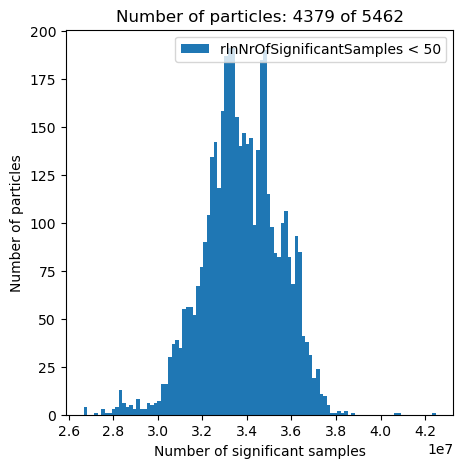

In [4]:
refinement_directory = relion_directory / "Refine3D" / "job352"
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
#print(len(run_data_particles))
#print(run_data_particles.columns)
#run_data_particles["rlnNrOfSignificantSamples"].describe()
Nr_cutoff = 50
plot_df = run_data_particles["rlnLogLikeliContribution"][run_data_particles["rlnNrOfSignificantSamples"] < Nr_cutoff]

#fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
# plot histogram of number of significant samples
#ax1.hist(run_data_particles["rlnNrOfSignificantSamples"], bins=1000)
#ax1.set_title(f"Total particles: {len(run_data_particles)}")
#ax1.set_xlabel("Number of significant samples")

ax2.hist(plot_df, bins=100, label=f"rlnNrOfSignificantSamples < {Nr_cutoff}")
ax2.set_title(f"Number of particles: {len(plot_df)} of {len(run_data_particles)}")
ax2.set_xlabel("Number of significant samples")
ax2.set_ylabel("Number of particles")
ax2.legend()

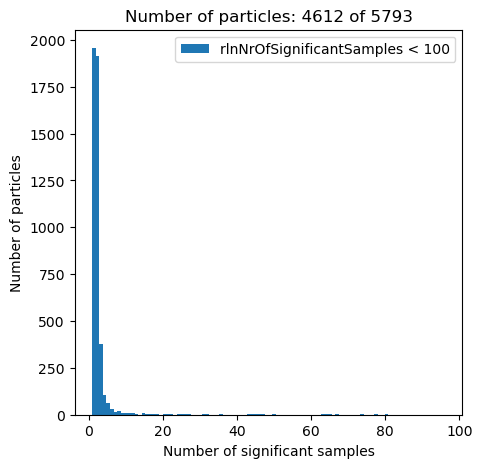

In [5]:
refinement_directory = relion_directory / "Refine3D" / "job351"
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
#print(len(run_data_particles))
#print(run_data_particles.columns)
#run_data_particles["rlnNrOfSignificantSamples"].describe()
Nr_cutoff = 100
plot_df = run_data_particles["rlnNrOfSignificantSamples"][run_data_particles["rlnNrOfSignificantSamples"] < Nr_cutoff]

#fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
# plot histogram of number of significant samples
#ax1.hist(run_data_particles["rlnNrOfSignificantSamples"], bins=1000)
#ax1.set_title(f"Total particles: {len(run_data_particles)}")
#ax1.set_xlabel("Number of significant samples")

ax2.hist(plot_df, bins=100, label=f"rlnNrOfSignificantSamples < {Nr_cutoff}")
ax2.set_title(f"Number of particles: {len(plot_df)} of {len(run_data_particles)}")
ax2.set_xlabel("Number of significant samples")
ax2.set_ylabel("Number of particles")
ax2.legend()

In [6]:
run_data_particles

,rlnTomoName,rlnCoordinateX,rlnCoordinateY,rlnCoordinateZ,rlnAngleRot,rlnAngleTilt,rlnAnglePsi,rlnOriginXAngst,rlnOriginYAngst,rlnOriginZAngst,...,rlnOpticsGroup,rlnClassNumber,rlnNormCorrection,rlnLogLikeliContribution,rlnMaxValueProbDistribution,rlnNrOfSignificantSamples,rlnGroupNumber,rlnTomoParticleName,rlnImageName,rlnCtfImage
0,ts_003,4699.337844,5942.592164,3167.857481,34.116576,24.741896,126.060832,-1.515640,0.649363,0.649363,...,1,1,1.0,39481560.0,0.083632,3174,1,ts_003/5,PseudoSubtomo/job349/Subtomograms/ts_003/5_dat...,PseudoSubtomo/job349/Subtomograms/ts_003/5_wei...
1,ts_003,1735.673844,1692.402845,2785.942759,52.577081,173.931368,-78.876050,-1.515640,-1.515640,-5.845640,...,1,1,1.0,38871880.0,0.026562,2509,1,ts_003/6,PseudoSubtomo/job349/Subtomograms/ts_003/6_dat...,PseudoSubtomo/job349/Subtomograms/ts_003/6_wei...
2,ts_003,707.341844,2714.042843,2545.616345,-126.618210,156.667145,-48.930480,0.649363,0.649363,-5.845640,...,1,1,1.0,40052240.0,0.025990,2887,1,ts_003/10,PseudoSubtomo/job349/Subtomograms/ts_003/10_da...,PseudoSubtomo/job349/Subtomograms/ts_003/10_we...
3,ts_003,5539.745486,2818.894483,2341.236119,-100.355710,122.862950,53.877002,2.814363,-1.515640,0.649363,...,1,1,1.0,42051980.0,0.002442,3141,1,ts_003/11,PseudoSubtomo/job349/Subtomograms/ts_003/11_da...,PseudoSubtomo/job349/Subtomograms/ts_003/11_we...
4,ts_003,909.956207,2714.626439,2362.149207,43.607707,157.666472,-129.130960,2.814363,-3.680640,0.649363,...,1,1,1.0,41239040.0,0.008207,3201,1,ts_003/13,PseudoSubtomo/job349/Subtomograms/ts_003/13_da...,PseudoSubtomo/job349/Subtomograms/ts_003/13_we...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,ts_124,5657.867801,8077.365801,2586.204763,-117.766390,48.361400,-52.990650,2.814363,2.814363,-5.845640,...,1,1,1.0,38098520.0,0.880797,2,109,ts_124/140,PseudoSubtomo/job349/Subtomograms/ts_124/140_d...,PseudoSubtomo/job349/Subtomograms/ts_124/140_w...
5789,ts_124,5848.946844,7560.843801,2330.323847,80.789237,93.525778,-166.308890,-1.515640,-3.680640,0.649363,...,1,1,1.0,38002140.0,0.997511,2,109,ts_124/141,PseudoSubtomo/job349/Subtomograms/ts_124/141_d...,PseudoSubtomo/job349/Subtomograms/ts_124/141_w...
5790,ts_124,5232.239118,7856.275164,2279.744299,90.608737,97.187352,-126.940530,-1.515640,-1.515640,9.309363,...,1,1,1.0,38172250.0,0.993307,1,109,ts_124/144,PseudoSubtomo/job349/Subtomograms/ts_124/144_d...,PseudoSubtomo/job349/Subtomograms/ts_124/144_w...
5791,ts_124,7334.985482,6770.520522,2363.408076,163.733611,114.985144,81.449513,2.814363,-3.680640,41.784363,...,1,1,1.0,37858670.0,0.999972,1,109,ts_124/147,PseudoSubtomo/job349/Subtomograms/ts_124/147_d...,PseudoSubtomo/job349/Subtomograms/ts_124/147_w...


In [7]:
column_to_sort = "rlnLogLikeliContribution"
number_of_top_particles = 4000

refinement_directory = relion_directory / "Refine3D" / "job352"
#####
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
# sort particles
run_data_particles = run_data_particles.sort_values(column_to_sort, ascending=False)
# select top 1000 particles
new_particles = run_data_particles.head(number_of_top_particles)
# write new star file
run_data_star["particles"] = new_particles
new_star_path = refinement_directory / f"run_data_top{number_of_top_particles}_{column_to_sort}.star"
starfile.write(run_data_star, new_star_path, overwrite=True)

In [8]:
class_data_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/Class3D/job330/class7_it050_data.star")
class_data = starfile.read(class_data_star)
class_data_particles = class_data["particles"]

FileNotFoundError: 

In [9]:
class_data_particles["rlnTomoName"].value_counts()  

NameError: name 'class_data_particles' is not defined

In [13]:
# Plot average loglikelihood contribution of particles coming from each tomogram
run_data_particles = starfile.read(relion_directory / "Refine3D" / "job282" / "run_data.star")["particles"]
len(run_data_particles.index)
thickness_star = starfile.read(relion_directory / "tomogram_info.star")
tomo_data = {}
for tomo_name, tomo_particles in run_data_particles.groupby("rlnTomoName"):
    tomo_data[tomo_name] = [thickness_star[thickness_star["rlnTomoName"] == tomo_name]["TomoThicknessNm"].values[0], tomo_particles["rlnMaxValueProbDistribution"].mean()]
grid_ts_numbers = [
    8, 12, 13,14,16, 17, 18, 33,40,41,42,44, 46, 48, 49,50, 
    51,52,53,56,57,61,62 ,64, 65, 66, 67, 68, 70, 71, 72, 73, 
    75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 
    101, 102, 103, 107, 108, 110, 111, 112, 113, 114, 116, 118, 120, 122, 123, 124
]
ts_names = run_data_particles['rlnTomoName'].unique()
grid_ts_names = [f"ts_{ts_number:03d}" for ts_number in grid_ts_numbers]
nogrid_ts_names = sorted(list(set(ts_names) - set(grid_ts_names)))

In [14]:

# Plot average loglikelihood contribution of particles coming from each tomogram
run_data_particles = starfile.read(relion_directory / "Refine3D" / "job292" / "run_data.star")["particles"]
len(run_data_particles.index)
thickness_star = starfile.read(relion_directory / "tomogram_info.star")
tomo_data2 = {}
for tomo_name, tomo_particles in run_data_particles.groupby("rlnTomoName"):
    tomo_data2[tomo_name] = [thickness_star[thickness_star["rlnTomoName"] == tomo_name]["TomoThicknessNm"].values[0], tomo_particles["rlnMaxValueProbDistribution"].mean()]
grid_ts_numbers = [
    8, 12, 13,14,16, 17, 18, 33,40,41,42,44, 46, 48, 49,50, 
    51,52,53,56,57,61,62 ,64, 65, 66, 67, 68, 70, 71, 72, 73, 
    75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 
    101, 102, 103, 107, 108, 110, 111, 112, 113, 114, 116, 118, 120, 122, 123, 124
]
ts_names = run_data_particles['rlnTomoName'].unique()
grid_ts_names = [f"ts_{ts_number:03d}" for ts_number in grid_ts_numbers]
nogrid_ts_names = sorted(list(set(ts_names) - set(grid_ts_names)))
##

Text(0.5, 0, 'Tomogram thickness (nm)')

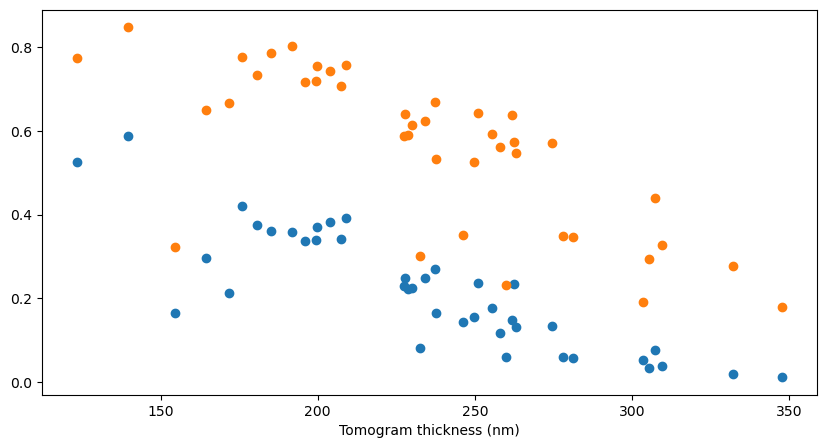

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_data = [tomo_data[ts_name] for ts_name in nogrid_ts_names]
plot_data = np.array(plot_data)
ax.scatter(plot_data[:, 0], plot_data[:, 1])
plot_data = [tomo_data2[ts_name] for ts_name in nogrid_ts_names]
plot_data = np.array(plot_data)
ax.scatter(plot_data[:, 0], plot_data[:, 1])
ax.set_xlabel("Tomogram thickness (nm)")
